In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

### Assuming some random values for the parameters for the binary system.
# $ a= a_1+a_2$
# $\frac{T^2}{a^3} =  \frac{4\pi^2}{G(m_1+m_2)}$
# $ a = \frac{T(v_1+v_2)}{2\pi}$
# $v_{com} = \frac{m_1v_1 + m_1v_1}{m_1+m_2}$
# $ v_{rad_{1}} = v_1 \sin({\frac{2\pi t}{T}})-v_{com}$
# $ v_{rad_{2}} = v_2 \sin({\frac{2\pi t}{T}}-\pi)-v_{com}$

In [2]:
m1 = random.randint(2e+30,3e+30) #mass of star1 in kg
m2 = random.randint(2e+30,3e+30) #mass of star2 in kg
m=m1+m2
t  = round(random.uniform(2,4),2) #time period of the system in years
G  = 6.67e-11

In [3]:
v=(2*np.pi*G*(m1+m2)/(t*365*24*3600))**(1/3) #combibned orbital velocity of the system
a=(v*t*365*24*3600)/(2*np.pi) #total separation of the system
a1=(m2*a)/m #semi major axis of star1
a2=(m1*a)/m #semi major axis of star2
v1=(2*np.pi*a1)/(t*24*365*3600) #orbital velocity of star1
v2=(2*np.pi*a2)/(t*24*365*3600) #orbital velocity of star2
vcom=((m1*v1)+(m2*v2))/(m1+m2) #orbital velocity of center of mass

In [4]:
print(f'Combined orbital Velocity: {v:e} m/s')
print(f'Total separation: {a:e} m\n\n')
print(f'Semi major axis of Star1: {a1:e} m\nSemi major axis of Star2: {a2:e} m \n')
print(f'Orbital velocity of Star1: {v1:e} m/s\nOrbital velocity of Star2: {v2:e} m/s \n')
print(f'Orbital velocity of Center of mass: {vcom:e} m/s\n')

Combined orbital Velocity: 2.861370e+04 m/s
Total separation: 4.653136e+11 m


Semi major axis of Star1: 2.375780e+11 m
Semi major axis of Star2: 2.277356e+11 m 

Orbital velocity of Star1: 1.460947e+04 m/s
Orbital velocity of Star2: 1.400423e+04 m/s 

Orbital velocity of Center of mass: 1.430045e+04 m/s



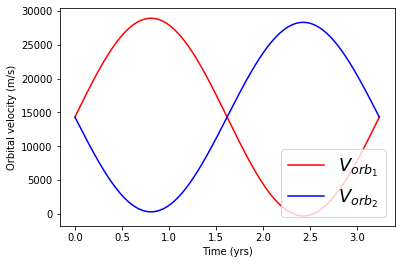

In [5]:
rad1=[] #radial velocity of star1 wrt time
rad2=[] #radial velocity of sta2 wrt time
for i in np.linspace(0,t,1000):
    vr1=v1*np.sin(2*np.pi*i/t)+vcom
    vr2=v2*np.sin((2*np.pi*i/t)-np.pi)+vcom
    rad1.append(vr1)
    rad2.append(vr2)
T=np.linspace(0,t,1000)
plt.plot(T,rad1,'-r', label=r'$V_{orb_{1}}$')
plt.plot(T,rad2,'-b', label=r'$V_{orb_{2}}$')
plt.xlabel("Time (yrs)")
plt.ylabel("Orbital velocity (m/s)")
plt.legend(loc="lower right",prop={'size': 18})
plt.show()

In [6]:
z1=[]
z2=[]
def doppler_shift():
    for i in range(len(rad1)):
        ds1=rad1[i]/299792458
        ds2=rad2[i]/299792458
        z1.append(ds1)
        z2.append(ds2)
        i+=1
    np.savetxt("doppler_shift.csv", np.column_stack((T.tolist(),z1,z2)),delimiter=",", fmt='%s')
    return print("Doppler Shift data CSV created")
doppler_shift()

Doppler Shift data CSV created
